<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/Assignment_K_Means_Clustering_CC_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Head:
   CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    

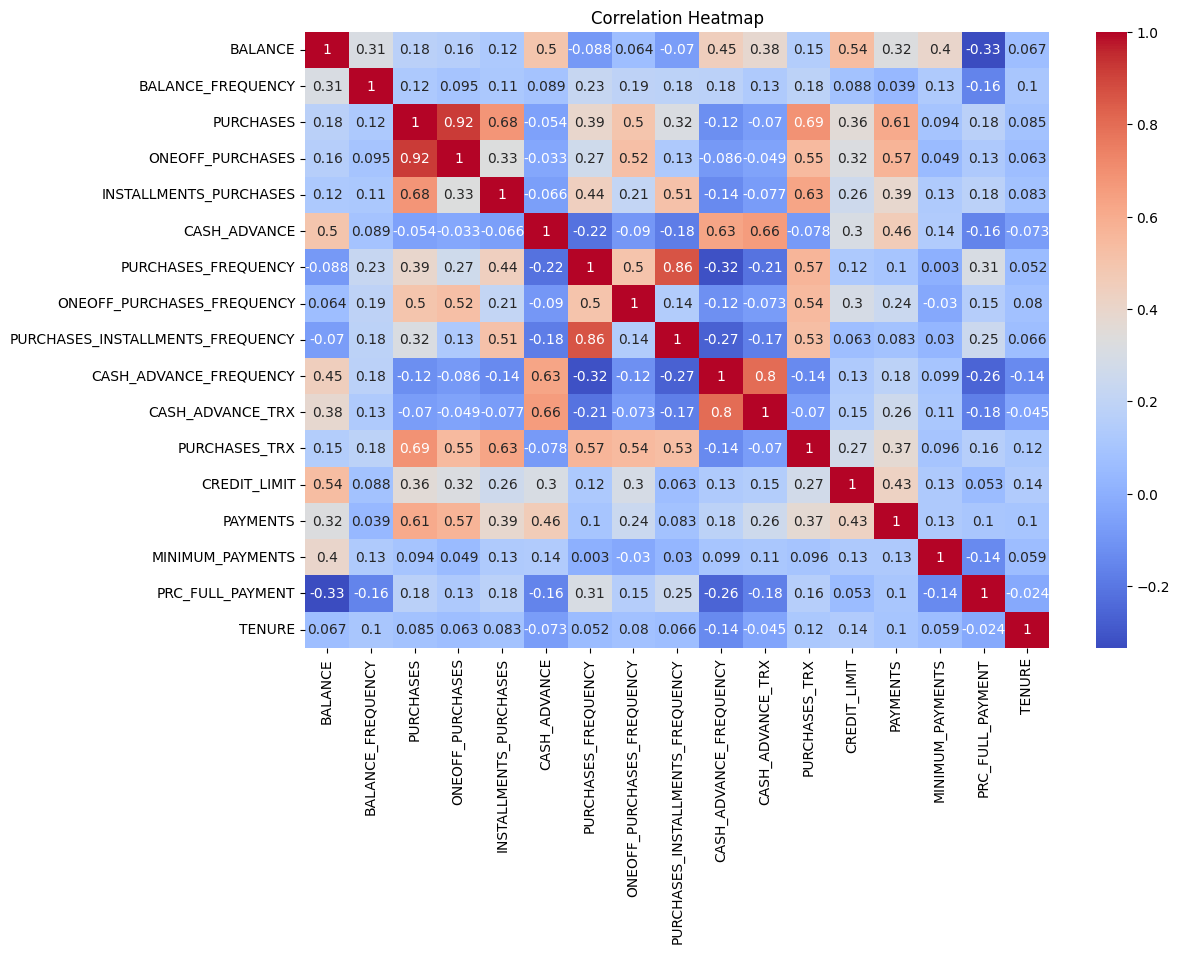

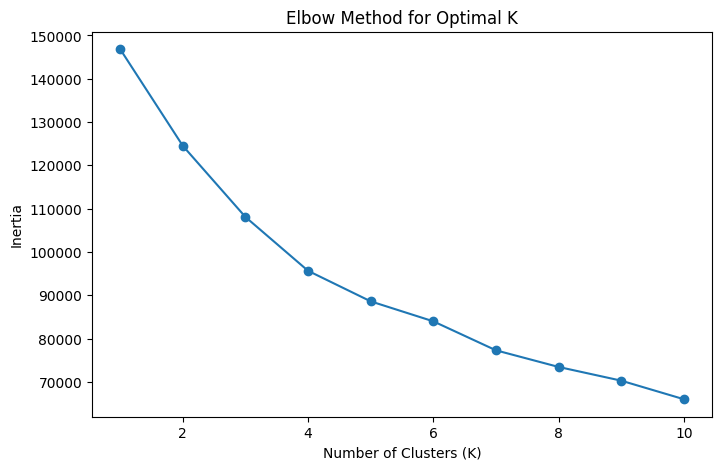

Silhouette Score for K=4: 0.20


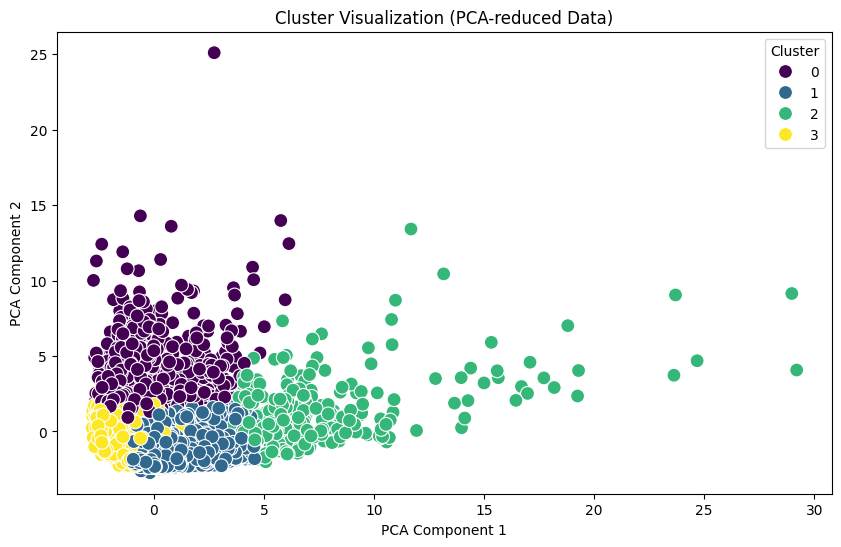


Cluster Summary:
              BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        4652.097509           0.969074   511.046007        324.079611   
1         970.417580           0.950767  1374.131996        687.243458   
2        3941.953414           0.985355  8980.111024       5968.520137   
3        1052.425406           0.818274   277.900840        212.097638   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    187.054270   4589.613925             0.290294   
1                    687.076807    223.014367             0.894701   
2                   3013.638669    764.360695             0.945113   
3                     66.154836    597.523951             0.181687   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                   

In [4]:
# Step 1: Setup and Data Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
file_path = "/content/CC GENERAL.csv"  # Update with your file path
data = pd.read_csv(file_path)

# Display dataset structure
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()

# Handle missing values (if any)
print("\nMissing Values:\n", data.isnull().sum())
data = data.dropna()

# Step 2: Data Exploration
# Visualize attribute distributions
#sns.pairplot(data.iloc[:, 1:5])  # Subset for pairwise plot due to dimensions
#plt.show()

# Correlation heatmap
#plt.figure(figsize=(12, 8))
#sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
#plt.title("Correlation Heatmap")
#plt.show()


# Step 2: Data Exploration - Correlation heatmap
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])  # Filters numeric columns

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 3: Preprocessing and Parameter Selection
# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 1:])  # Exclude the first column (ID or similar)

# Step 4: Performing K-Means Clustering
# Finding the optimal number of clusters (K) using the elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Step 5: Evaluate Clustering Quality
# Choose K based on the elbow point (let's assume K=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Evaluate using silhouette score
sil_score = silhouette_score(data_scaled, cluster_labels)
print(f"Silhouette Score for K={optimal_k}: {sil_score:.2f}")

# Step 6: Cluster Analysis
# Visualize clusters (using first two principal components for simplicity)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cluster_labels, palette="viridis", s=100)
plt.title("Cluster Visualization (PCA-reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Analyze cluster characteristics
#cluster_summary = data.groupby('Cluster').mean()

# Analyze cluster characteristics (Cluster Summary)
# Select only numeric columns for grouping and analysis
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Filter numeric columns

cluster_summary = data[numeric_columns].groupby(data['Cluster']).mean()
print("\nCluster Summary:\n", cluster_summary)



# Save the results
data.to_csv("Clustered_Data_CC.csv", index=False)
print("Clustered data saved as 'Clustered_Data_CC.csv'.")
